# Preprocessing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('diabetic_data.csv')

## Handling missing values:

In [3]:
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

max_glu_serum    96420
A1Cresult        84748
dtype: int64


Since `max_glu_serum` and `A1Cresult` columns have a very high percentage of missing values (about 94.2% and 83.3% missing respectively), We considered dropping them.

Also we dropped  'encounter_id','patient_nbr' since they are unique values.

In [4]:
columns_to_drop = ['max_glu_serum', 'A1Cresult','encounter_id','patient_nbr']
data.drop(columns=columns_to_drop, inplace=True)

## Handling Errors:

In [5]:
unique_counts = {}

for col in data.columns:
    unique_counts[col] = data[col].nunique()

columns_unique = {col: count for col, count in unique_counts.items() if count > 20}

sorted_columns = sorted(columns_unique.items(), key=lambda x: x[1], reverse=True)

for col, count in sorted_columns:
    print(f"Number of unique values in '{col}': {count}")

Number of unique values in 'diag_3': 790
Number of unique values in 'diag_2': 749
Number of unique values in 'diag_1': 717
Number of unique values in 'num_lab_procedures': 118
Number of unique values in 'num_medications': 75
Number of unique values in 'medical_specialty': 73
Number of unique values in 'number_outpatient': 39
Number of unique values in 'number_emergency': 33
Number of unique values in 'discharge_disposition_id': 26
Number of unique values in 'number_inpatient': 21


Since there are too many unique values for diag1-3 and they are diagnostic codes unknown to us, we considered removing them.

In [6]:
columns_to_drop = ['diag_3', 'diag_2','diag_1']
data.drop(columns=columns_to_drop, inplace=True)

In [7]:
columns_to_exclude = ['encounter_id', 'patient_nbr']
columns_to_check = [col for col in data.columns if col not in columns_to_exclude]

for col in columns_to_check:
    unique_values_counts = data[col].value_counts()
    print(f"Unique values and their counts in '{col}':")
    print(unique_values_counts)
    print()


Unique values and their counts in 'race':
race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

Unique values and their counts in 'gender':
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

Unique values and their counts in 'age':
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

Unique values and their counts in 'weight':
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

Unique values and their counts in 'admission_type_id':
admission_type_id
1    53990
3    18869
2    184

We dropped the "weight" column due to its high number of missing values, as well as the "payer_code" and "medical_specialty" columns.

In [8]:
data = data[data['race'] != '?']

data = data[data['gender'] != 'Unknown/Invalid']

columns_to_drop = ['weight', 'payer_code', 'medical_specialty']
data = data.drop(columns=columns_to_drop)

columns_to_check = [col for col in data.columns if col not in columns_to_exclude]
for col in columns_to_check:
    unique_values_counts = data[col].value_counts()
    print(f"Unique values and their counts in '{col}':")
    print(unique_values_counts)
    print()

Unique values and their counts in 'race':
race
Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1505
Asian                641
Name: count, dtype: int64

Unique values and their counts in 'gender':
gender
Female    53575
Male      45917
Name: count, dtype: int64

Unique values and their counts in 'age':
age
[70-80)     25468
[60-70)     21988
[50-60)     16895
[80-90)     16800
[40-50)      9465
[30-40)      3699
[90-100)     2724
[20-30)      1611
[10-20)       682
[0-10)        160
Name: count, dtype: int64

Unique values and their counts in 'admission_type_id':
admission_type_id
1    52900
3    18507
2    17786
6     5225
5     4727
8      317
7       20
4       10
Name: count, dtype: int64

Unique values and their counts in 'discharge_disposition_id':
discharge_disposition_id
1     58767
3     13614
6     12698
18     3673
2      2061
22     1981
11     1608
5      1143
25      973
4       765
7       611
23      406
13      397
14      

In [9]:
# import pandas as pd

# threshold = 0.01

# total_rows = len(data)

# columns_to_exclude = ['encounter_id', 'patient_nbr']  # Add columns you want to exclude from this process

# for col in data.columns:
#     if col not in columns_to_exclude:
#         unique_values_counts = data[col].value_counts()
        
#         percentages = unique_values_counts / total_rows
#         values_to_drop = percentages[percentages < threshold].index
#         print(col,data.shape)
        
#         data = data[~data[col].isin(values_to_drop)]


## Getting General idea from our data and dropping outliers : 

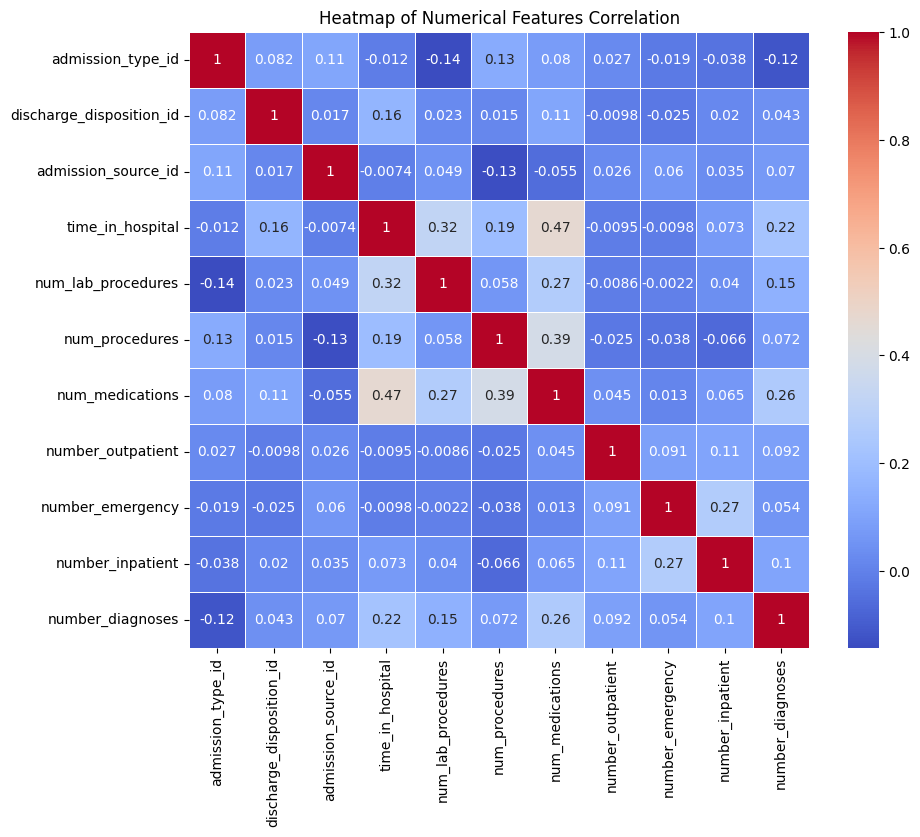

In [10]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

data_numerical = data[numerical_columns]

correlation_matrix = data_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

In [11]:
print(data["readmitted"].unique())

['NO' '>30' '<30']


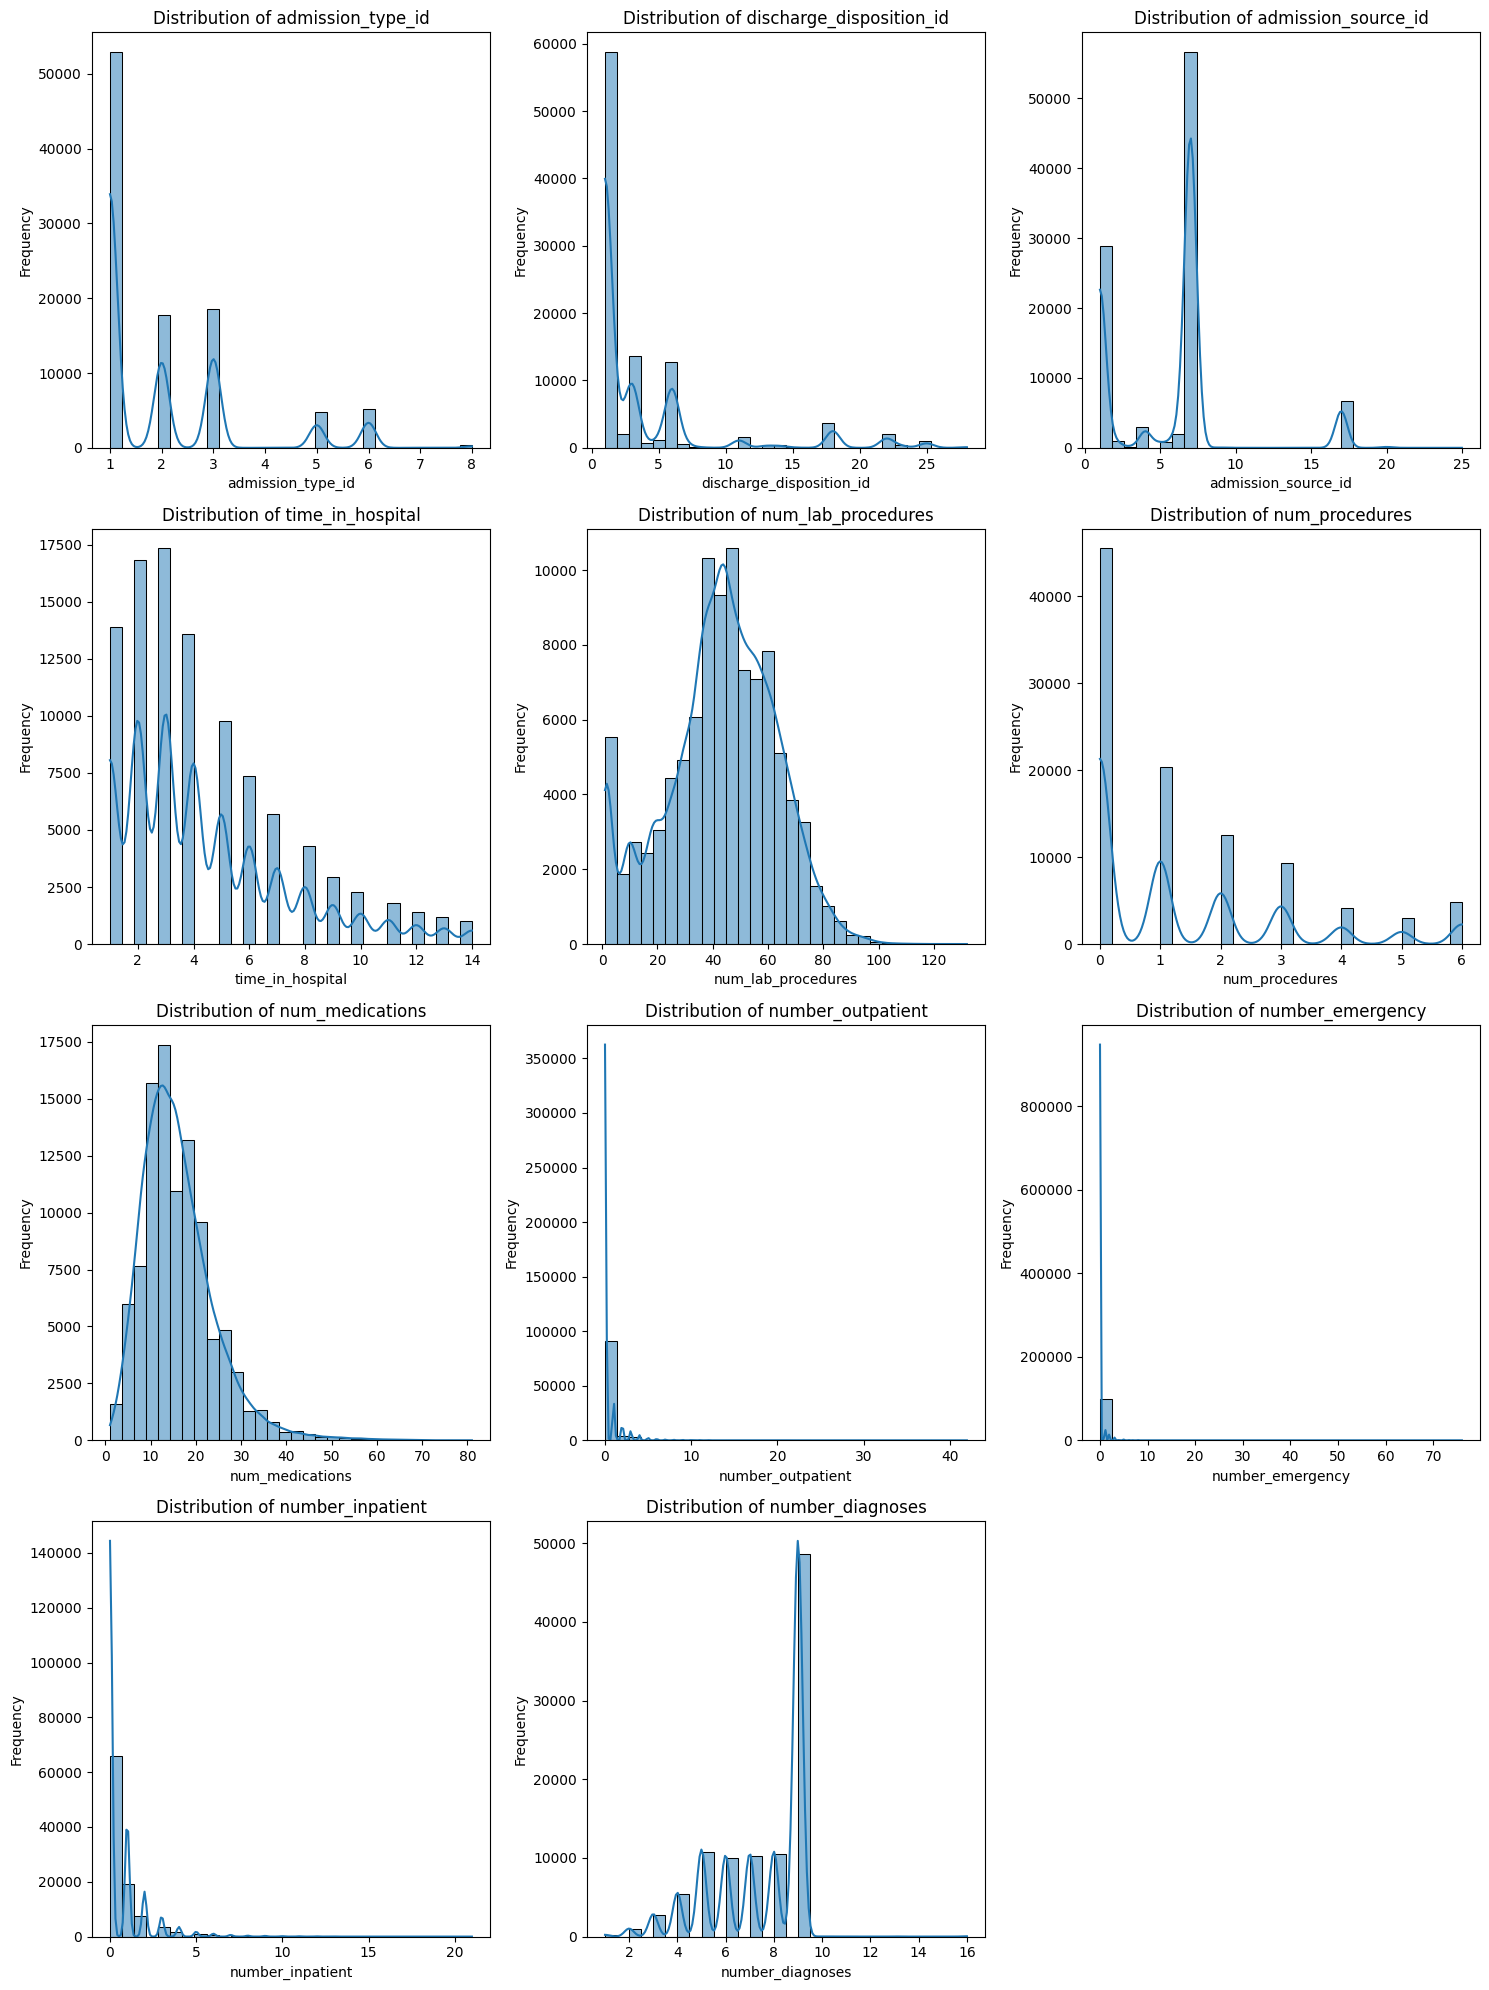

In [12]:
num_plots = len(numerical_columns)
num_rows = int(num_plots / 3) + (num_plots % 3 > 0)
num_cols = min(3, num_plots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

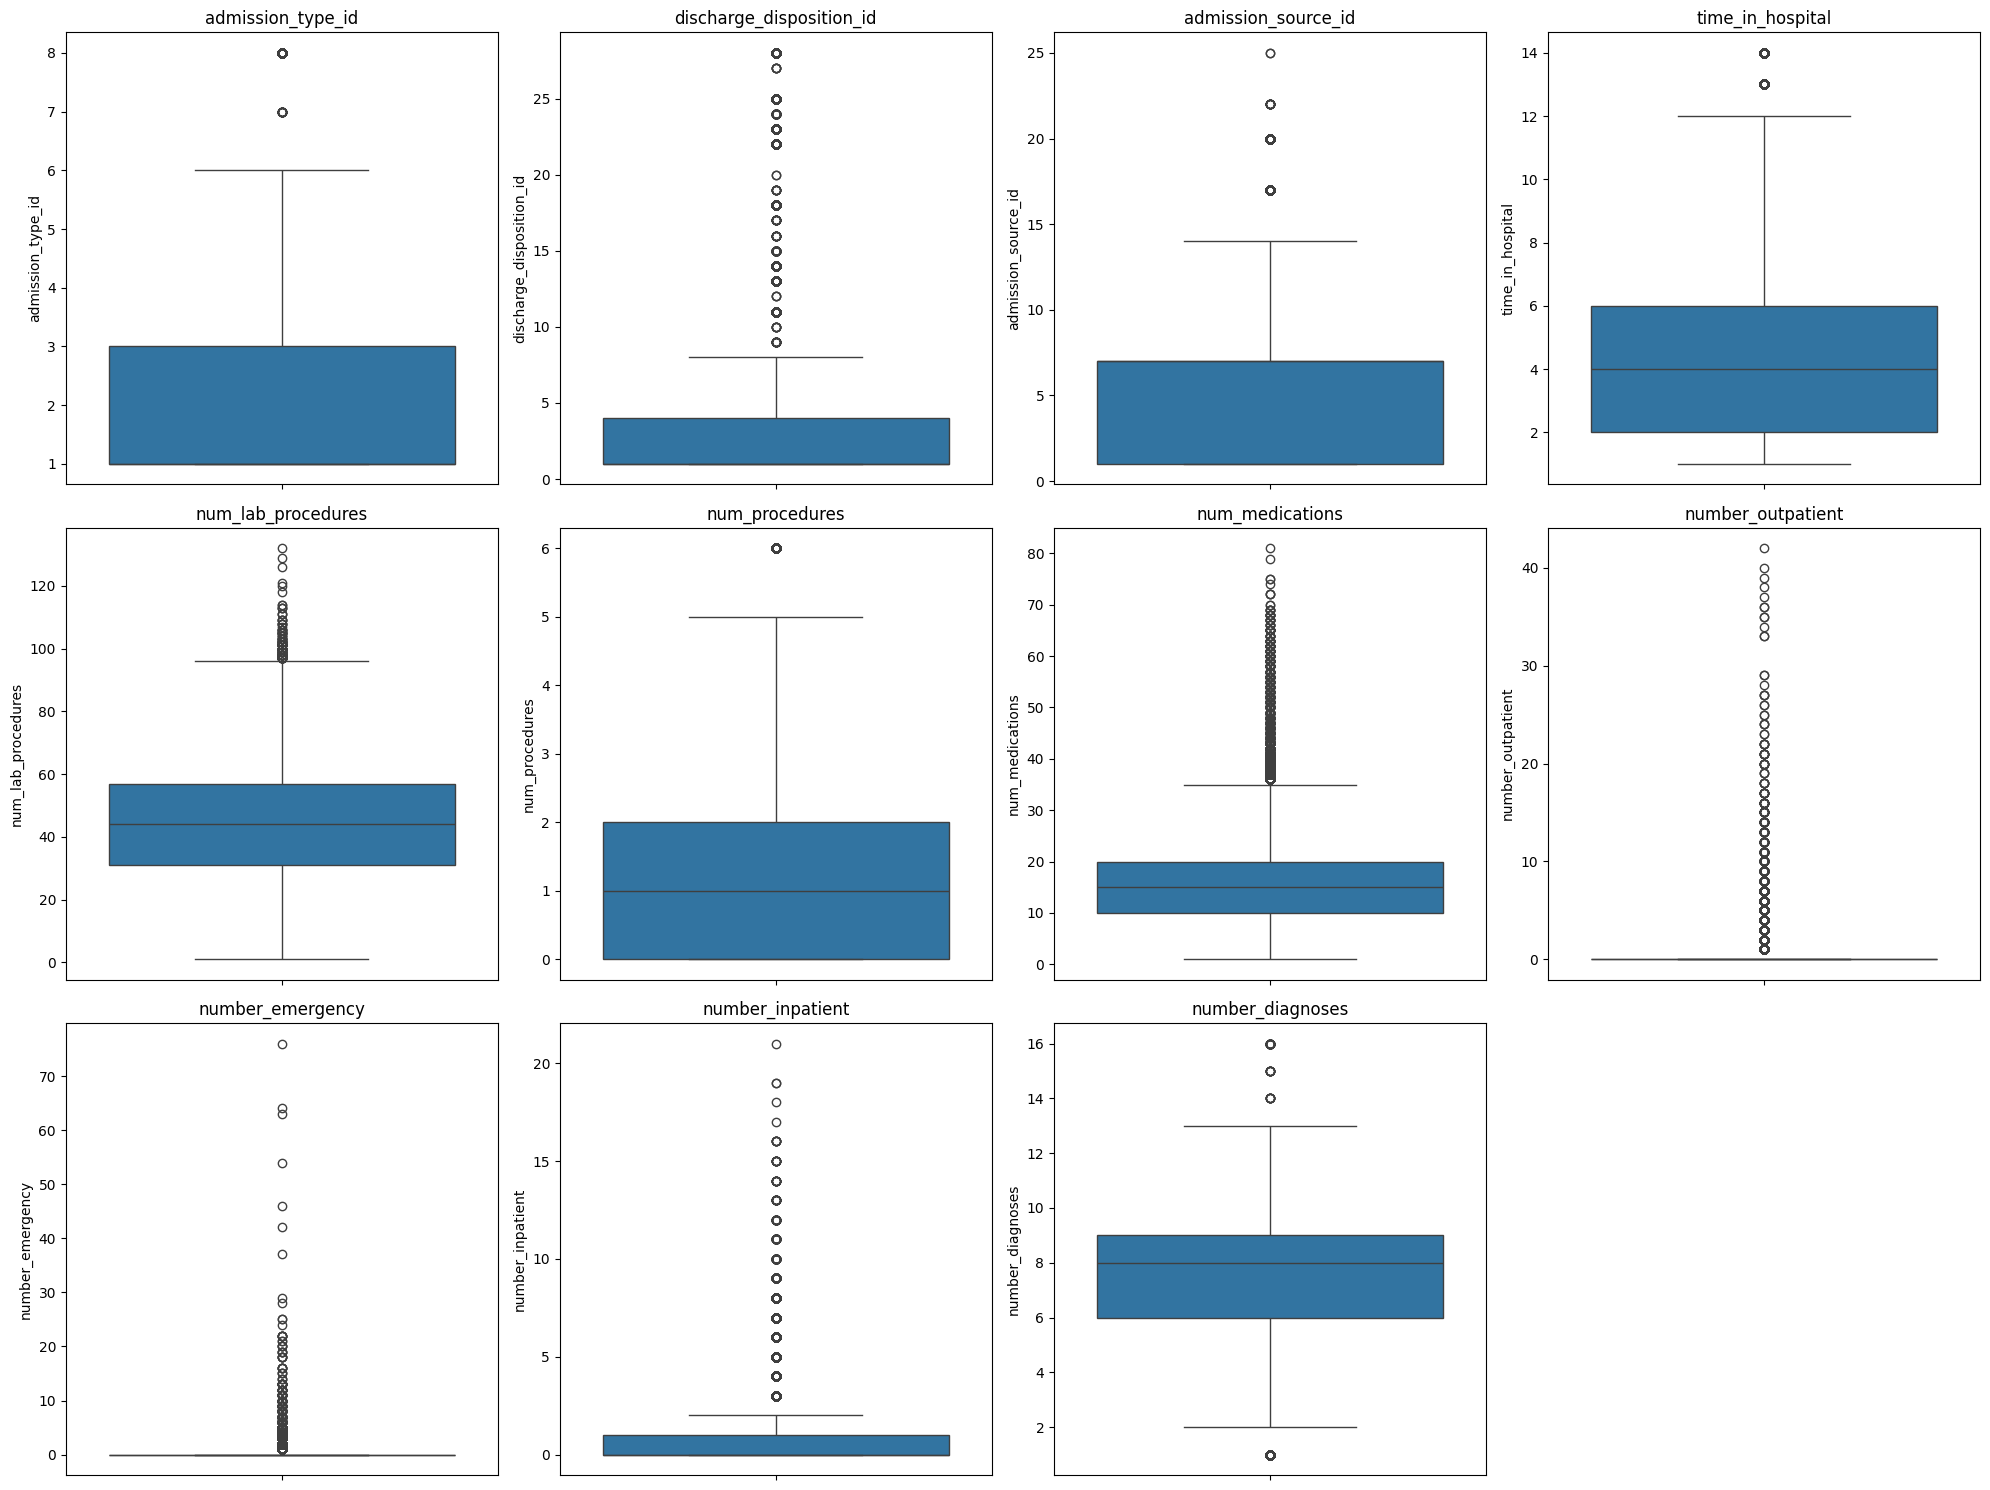

In [13]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

num_columns = len(numerical_columns)
num_rows = (num_columns // 4) + 1

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

Using `winsorize` we consider dropping oulires of upper and down of 5 percent of our data  above 95% or under 5 % our data .

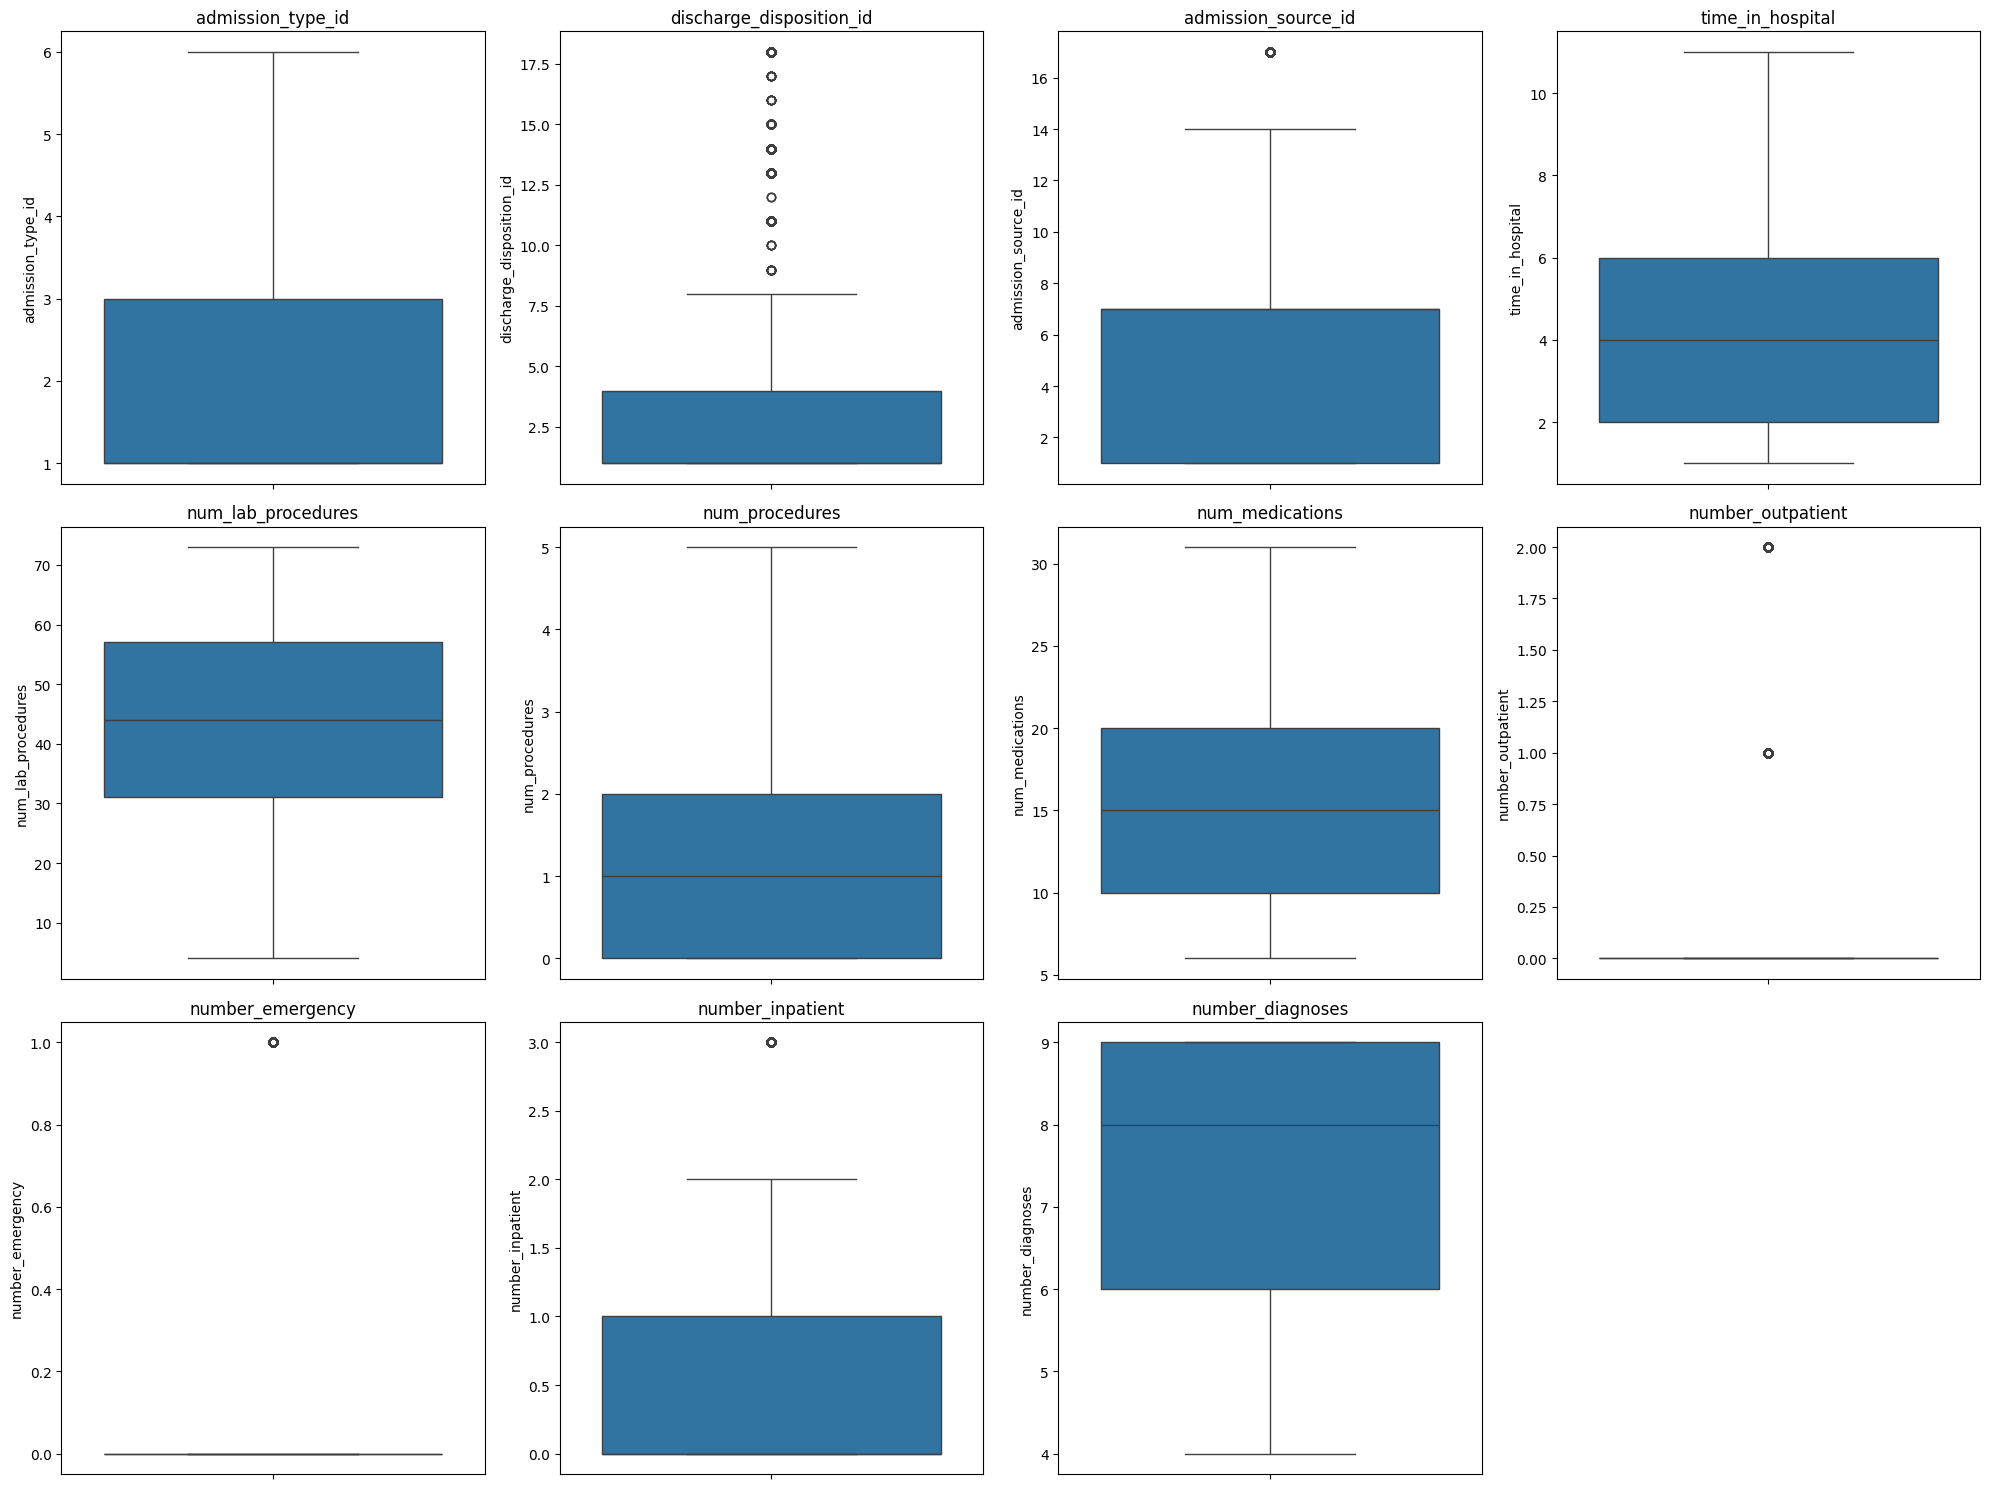

In [14]:
from scipy.stats.mstats import winsorize

numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    data[column] = winsorize(data[column], limits=[0.05, 0.05])

num_columns = len(numerical_columns)
num_rows = (num_columns // 4) + 1

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


## Encoding Categorical Variables

In [15]:
data.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [16]:
numerical_columns = data.select_dtypes(include=['int64', 'float64','int', 'float']).columns

data_categorical = data.drop(columns=numerical_columns)

data_encoded = pd.get_dummies(data_categorical, drop_first=True, dtype=int)

data = pd.concat([data[numerical_columns], data_encoded], axis=1)

print(data.head())

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        18                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                6   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  ...  \
0                  0                 0             

In [17]:
data.to_csv("diabetic_clean.csv",index=False)